In [53]:
from PIL import Image
import numpy as np

# Ouvrir et convertir en RGB
img = Image.open("ch_16_4.jpg").convert("RGB")

# Redimensionner si un côté dépasse 4000 px
max_side = 2500
w, h = img.size
scale = min(max_side / w, max_side / h, 1.0)
new_size = (int(w * scale), int(h * scale))
img_resized = img.resize(new_size, Image.Resampling.LANCZOS)

# Sauvegarder l'image redimensionnée
img_np = np.array(img_resized)


In [54]:
from PIL import Image
import numpy as np

def resize_image(img_path, max_side):
    """
    Redimensionne une image pour que son plus grand côté <= max_side.
    Retourne :
        - l'image redimensionnée en numpy.ndarray (RGB)
        - le facteur de réduction (ex: 2.0 signifie divisée par 2)
    """
    # Ouvrir et convertir en RGB
    img = Image.open(img_path).convert("RGB")
    
    # Dimensions originales
    w, h = img.size
    
    # Calcul du facteur de réduction
    scale = min(max_side / w, max_side / h, 1.0)
    
    # Nouvelle taille
    new_size = (int(w * scale), int(h * scale))
    img_resized = img.resize(new_size, Image.Resampling.LANCZOS)
    
    # Facteur : combien l'image a été réduite (w / new_w)
    reduction_factor = w / new_size[0]
    
    return np.array(img_resized), reduction_factor

# Exemple d'utilisation
img_np, factor = resize_image("ch_16_4.jpg", 2500)
print(f"Image réduite par un facteur de {factor}")
print(f"Taille finale : {img_np.shape[1]}x{img_np.shape[0]}")


Image réduite par un facteur de 1.6981132075471699
Taille finale : 530x2500


In [55]:
# Initialize PaddleOCR instance
from paddleocr import PaddleOCR
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False,
    lang='fr')

# Run OCR inference on a sample image 
result = ocr.predict(
    input=img_np)  # Change to your image path

# Visualize the results and save the JSON results
for res in result:
    res.print()
    res.save_to_img("output")
    res.save_to_json("output")

MKL-DNN is not available. Using `paddle` instead.
Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/teo/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('latin_PP-OCRv5_mobile_rec', None)
Using official model (latin_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in /Users/teo/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

{'res': {'input_path': None, 'page_index': None, 'model_settings': {'use_doc_preprocessor': True, 'use_textline_orientation': False}, 'doc_preprocessor_res': {'input_path': None, 'page_index': None, 'model_settings': {'use_doc_orientation_classify': False, 'use_doc_unwarping': False}, 'angle': -1}, 'dt_polys': array([[[ 240,  148],
        ...,
        [ 240,  172]],

       ...,

       [[ 100, 1775],
        ...,
        [   0, 1866]]], shape=(11, 4, 2), dtype=int16), 'text_det_params': {'limit_side_len': 64, 'limit_type': 'min', 'thresh': 0.3, 'max_side_limit': 4000, 'box_thresh': 0.6, 'unclip_ratio': 1.5}, 'text_type': 'general', 'textline_orientation_angles': array([-1, ..., -1], shape=(11,)), 'text_rec_score_thresh': 0.0, 'rec_texts': ['ONLY A FEW', 'THINGS ARE REMAINING', 'THAT / CAN TEACH', 'HIM NOW.', 'WELL,', "WE DON'T", 'NEED SOMEONE', 'ELSE TO FIND OUR', 'OWN PATH OF', 'SWORD.', 'Xinur'], 'rec_scores': array([0.99599838, ..., 0.47713128], shape=(11,)), 'rec_polys': array([[

In [56]:
result

[{'input_path': None,
  'page_index': None,
  'doc_preprocessor_res': {'input_path': None,
   'page_index': None,
   'input_img': array([[[255, ..., 255],
           ...,
           [255, ..., 255]],
   
          ...,
   
          [[255, ..., 255],
           ...,
           [255, ..., 255]]], shape=(2500, 530, 3), dtype=uint8),
   'model_settings': {'use_doc_orientation_classify': False,
    'use_doc_unwarping': False},
   'angle': -1,
   'rot_img': array([[[255, ..., 255],
           ...,
           [255, ..., 255]],
   
          ...,
   
          [[255, ..., 255],
           ...,
           [255, ..., 255]]], shape=(2500, 530, 3), dtype=uint8),
   'output_img': array([[[255, ..., 255],
           ...,
           [255, ..., 255]],
   
          ...,
   
          [[255, ..., 255],
           ...,
           [255, ..., 255]]], shape=(2500, 530, 3), dtype=uint8)},
  'dt_polys': [array([[240, 148],
          ...,
          [240, 172]], shape=(4, 2), dtype=int16),
   array([[177, 172

In [57]:
def extract_text_from_image(image_path):
    ocr = PaddleOCR(
        use_doc_orientation_classify=False,
        use_doc_unwarping=False,
        use_textline_orientation=False,
        lang='fr')
    result = ocr.predict(
        input=image_path)

    return result

In [58]:
result

[{'input_path': None,
  'page_index': None,
  'doc_preprocessor_res': {'input_path': None,
   'page_index': None,
   'input_img': array([[[255, ..., 255],
           ...,
           [255, ..., 255]],
   
          ...,
   
          [[255, ..., 255],
           ...,
           [255, ..., 255]]], shape=(2500, 530, 3), dtype=uint8),
   'model_settings': {'use_doc_orientation_classify': False,
    'use_doc_unwarping': False},
   'angle': -1,
   'rot_img': array([[[255, ..., 255],
           ...,
           [255, ..., 255]],
   
          ...,
   
          [[255, ..., 255],
           ...,
           [255, ..., 255]]], shape=(2500, 530, 3), dtype=uint8),
   'output_img': array([[[255, ..., 255],
           ...,
           [255, ..., 255]],
   
          ...,
   
          [[255, ..., 255],
           ...,
           [255, ..., 255]]], shape=(2500, 530, 3), dtype=uint8)},
  'dt_polys': [array([[240, 148],
          ...,
          [240, 172]], shape=(4, 2), dtype=int16),
   array([[177, 172

In [59]:
import pandas as pd
result[0]["rec_polys"]
def ocr_results_to_dataframe(ocr_results):
    data = []
    for line in ocr_results:
        for word_info in line:
            bbox = word_info[0]             # coordonnées de la boîte [x1,y1,x2,y2,...]
            text, score = word_info[1]      # texte et confiance
            data.append({"text": text, "confidence": score, "bbox": bbox})
    
    df = pd.DataFrame(data)
    return df


In [60]:
import pandas as pd

def ocr_results_to_dataframe(result):
    """
    Transforme la sortie PaddleOCR en DataFrame pandas.
    
    Paramètre:
        result : sortie de ocr.predict()
        
    Retourne:
        df : pandas.DataFrame avec colonnes ['text', 'poly', 'score', 'box']
    """
    df = pd.DataFrame({
        "text": result[0]["rec_texts"],
        "poly": result[0]["rec_polys"],
        "score": result[0]["rec_scores"],
        "box": result[0]["rec_boxes"]
    })
    
    return df


In [61]:
import pandas as pd

def ocr_results_to_dataframe(result):
    texts = result[0]["rec_texts"]
    polys = result[0]["rec_polys"]
    scores = result[0]["rec_scores"]
    
    data = []
    for i in range(len(texts)):
        if len(polys[i]) != 4:
            raise ValueError(f"Le polygone de la ligne {i} a {len(polys[i])} points au lieu de 4")
        
        row = {"text": texts[i], "score": scores[i]}
        for j, point in enumerate(polys[i]):
            row[f"x{j+1}"] = point[0]
            row[f"y{j+1}"] = point[1]
        data.append(row)
    
    df = pd.DataFrame(data)
    return df


In [62]:
df = ocr_results_to_dataframe(result)

In [63]:
def filter_by_score(df, min_score=0.5):
    df_filtered = df[df['score'] >= min_score].reset_index(drop=True)
    return df_filtered


In [64]:
filter_by_score(df, min_score=0.5)

,text,score,x1,y1,x2,y2,x3,y3,x4,y4
0,ONLY A FEW,0.995998,240,148,371,148,371,172,240,172
1,THINGS ARE REMAINING,0.988036,177,172,433,172,433,196,177,196
2,THAT / CAN TEACH,0.989309,208,198,403,198,403,222,208,222
3,HIM NOW.,0.999486,249,223,355,223,355,247,249,247
4,"WELL,",0.997695,76,682,167,684,166,729,75,726
5,WE DON'T,0.998874,275,1212,388,1210,389,1238,275,1240
6,NEED SOMEONE,0.999617,243,1239,418,1239,418,1263,243,1263
7,ELSE TO FIND OUR,0.997615,229,1264,434,1264,434,1288,229,1288
8,OWN PATH OF,0.969900,254,1288,407,1286,407,1311,255,1313
9,SWORD.,0.999008,284,1313,373,1313,373,1338,284,1338


In [65]:
from shapely.geometry import Polygon
import networkx as nx

def cluster_polygons(polys_points, margin_factor=0.1):
    """
    Cluster des polygones en fonction de leur chevauchement.
    La marge autour de chaque polygone est proportionnelle à sa taille.
    
    Parameters:
    - polys_points: liste de np.array, chaque array contient les points (x, y) du polygone
    - margin_factor: float, fraction de la "taille" du polygone utilisée comme marge
    
    Returns:
    - clusters: liste de sets, chaque set contient les indices des polygones du cluster
    """
    
    polygons = [Polygon(p) for p in polys_points]
    
    # Agrandir chaque polygone proportionnellement à sa taille
    polygons_expanded = []
    for poly in polygons:
        size = poly.area**0.5  # racine carrée de l'aire comme mesure de taille
        margin = size * margin_factor
        polygons_expanded.append(poly.buffer(margin))
    
    # Construire le graphe
    G = nx.Graph()
    G.add_nodes_from(range(len(polygons_expanded)))
    
    for i in range(len(polygons_expanded)):
        for j in range(i+1, len(polygons_expanded)):
            if polygons_expanded[i].intersects(polygons_expanded[j]):
                G.add_edge(i, j)
    
    clusters = list(nx.connected_components(G))
    return clusters


In [66]:
cluster_polygons(result[0]["rec_polys"], margin_factor=0.1)

[{0, 1, 2, 3}, {4}, {5, 6, 7, 8, 9}, {10}]

In [67]:
from shapely.geometry import Polygon
import networkx as nx

def cluster_polygons(df, *coord_cols, margin_factor=0.1):

    if len(coord_cols) % 2 != 0:
        raise ValueError("Il faut un nombre pair de colonnes pour former les points (x, y).")
    
    n_points = len(coord_cols) // 2
    polys_points = []
    
    for idx, row in df.iterrows():
        points = []
        for i in range(n_points):
            x_col = coord_cols[2*i]
            y_col = coord_cols[2*i + 1]
            points.append([row[x_col], row[y_col]])
        polys_points.append(points)
    
    polygons = [Polygon(p) for p in polys_points]
    
    # Agrandir chaque polygone proportionnellement à sa taille
    polygons_expanded = []
    for poly in polygons:
        size = poly.area**0.5
        margin = size * margin_factor
        polygons_expanded.append(poly.buffer(margin))
    
    # Construire le graphe
    G = nx.Graph()
    G.add_nodes_from(range(len(polygons_expanded)))
    
    for i in range(len(polygons_expanded)):
        for j in range(i+1, len(polygons_expanded)):
            if polygons_expanded[i].intersects(polygons_expanded[j]):
                G.add_edge(i, j)
    
    clusters = list(nx.connected_components(G))
    return clusters


In [68]:
clusters = cluster_polygons(df, "x1","y1","x2","y2","x3","y3","x4","y4", margin_factor=0.1)

In [69]:
import matplotlib.pyplot as plt
import random
from shapely.geometry import Polygon

def draw_clusters_from_df(df, *coord_cols, margin_factor=0.1, dpi=600, linewidth=0.2):
    """
    Dessine des polygones groupés par cluster à partir d'un DataFrame.
    
    Chaque polygone est dessiné deux fois : original et agrandi avec une marge proportionnelle à sa taille.
    
    Parameters:
    - df: pandas.DataFrame contenant les colonnes de coordonnées
    - *coord_cols: noms des colonnes (x1, y1, x2, y2, ...)
    - margin_factor: float, fraction de la "taille" du polygone utilisée comme marge
    - dpi: résolution de l'image
    - linewidth: épaisseur des traits
    """
    # Construire la liste de polygones à partir du DataFrame
    n_points = len(coord_cols) // 2
    polys_points = []
    for idx, row in df.iterrows():
        points = []
        for i in range(n_points):
            x_col = coord_cols[2*i]
            y_col = coord_cols[2*i + 1]
            points.append([row[x_col], row[y_col]])
        polys_points.append(points)
    
    # Clustering
    clusters = cluster_polygons(df, *coord_cols, margin_factor=margin_factor)
    
    plt.figure(figsize=(12, 12), dpi=dpi)
    ax = plt.gca()
    
    # Convertir chaque polygone pour matplotlib
    polys = [Polygon(p) for p in polys_points]
    
    # Dessiner chaque cluster avec une couleur différente
    for cluster in clusters:
        color = [random.random() for _ in range(3)]
        for idx in cluster:
            poly = polys[idx]
            # Polygon original
            ax.add_patch(plt.Polygon(list(poly.exterior.coords), fill=False, edgecolor=color, linewidth=linewidth))
            
            # Polygon agrandi avec marge proportionnelle à sa taille
            size = poly.area**0.5
            margin = size * margin_factor
            poly_buffered = poly.buffer(margin)
            ax.add_patch(plt.Polygon(list(poly_buffered.exterior.coords), fill=False, edgecolor=color, linestyle='--', linewidth=linewidth))
    
    # Ajuster limites
    all_x = [pt[0] for p in polys_points for pt in p]
    all_y = [pt[1] for p in polys_points for pt in p]
    ax.set_xlim(min(all_x) - 50, max(all_x) + 50)
    ax.set_ylim(min(all_y) - 50, max(all_y) + 50)
    ax.invert_yaxis()
    
    ax.set_aspect('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters de polygones (plein = original, tireté = agrandi)')
    plt.show()


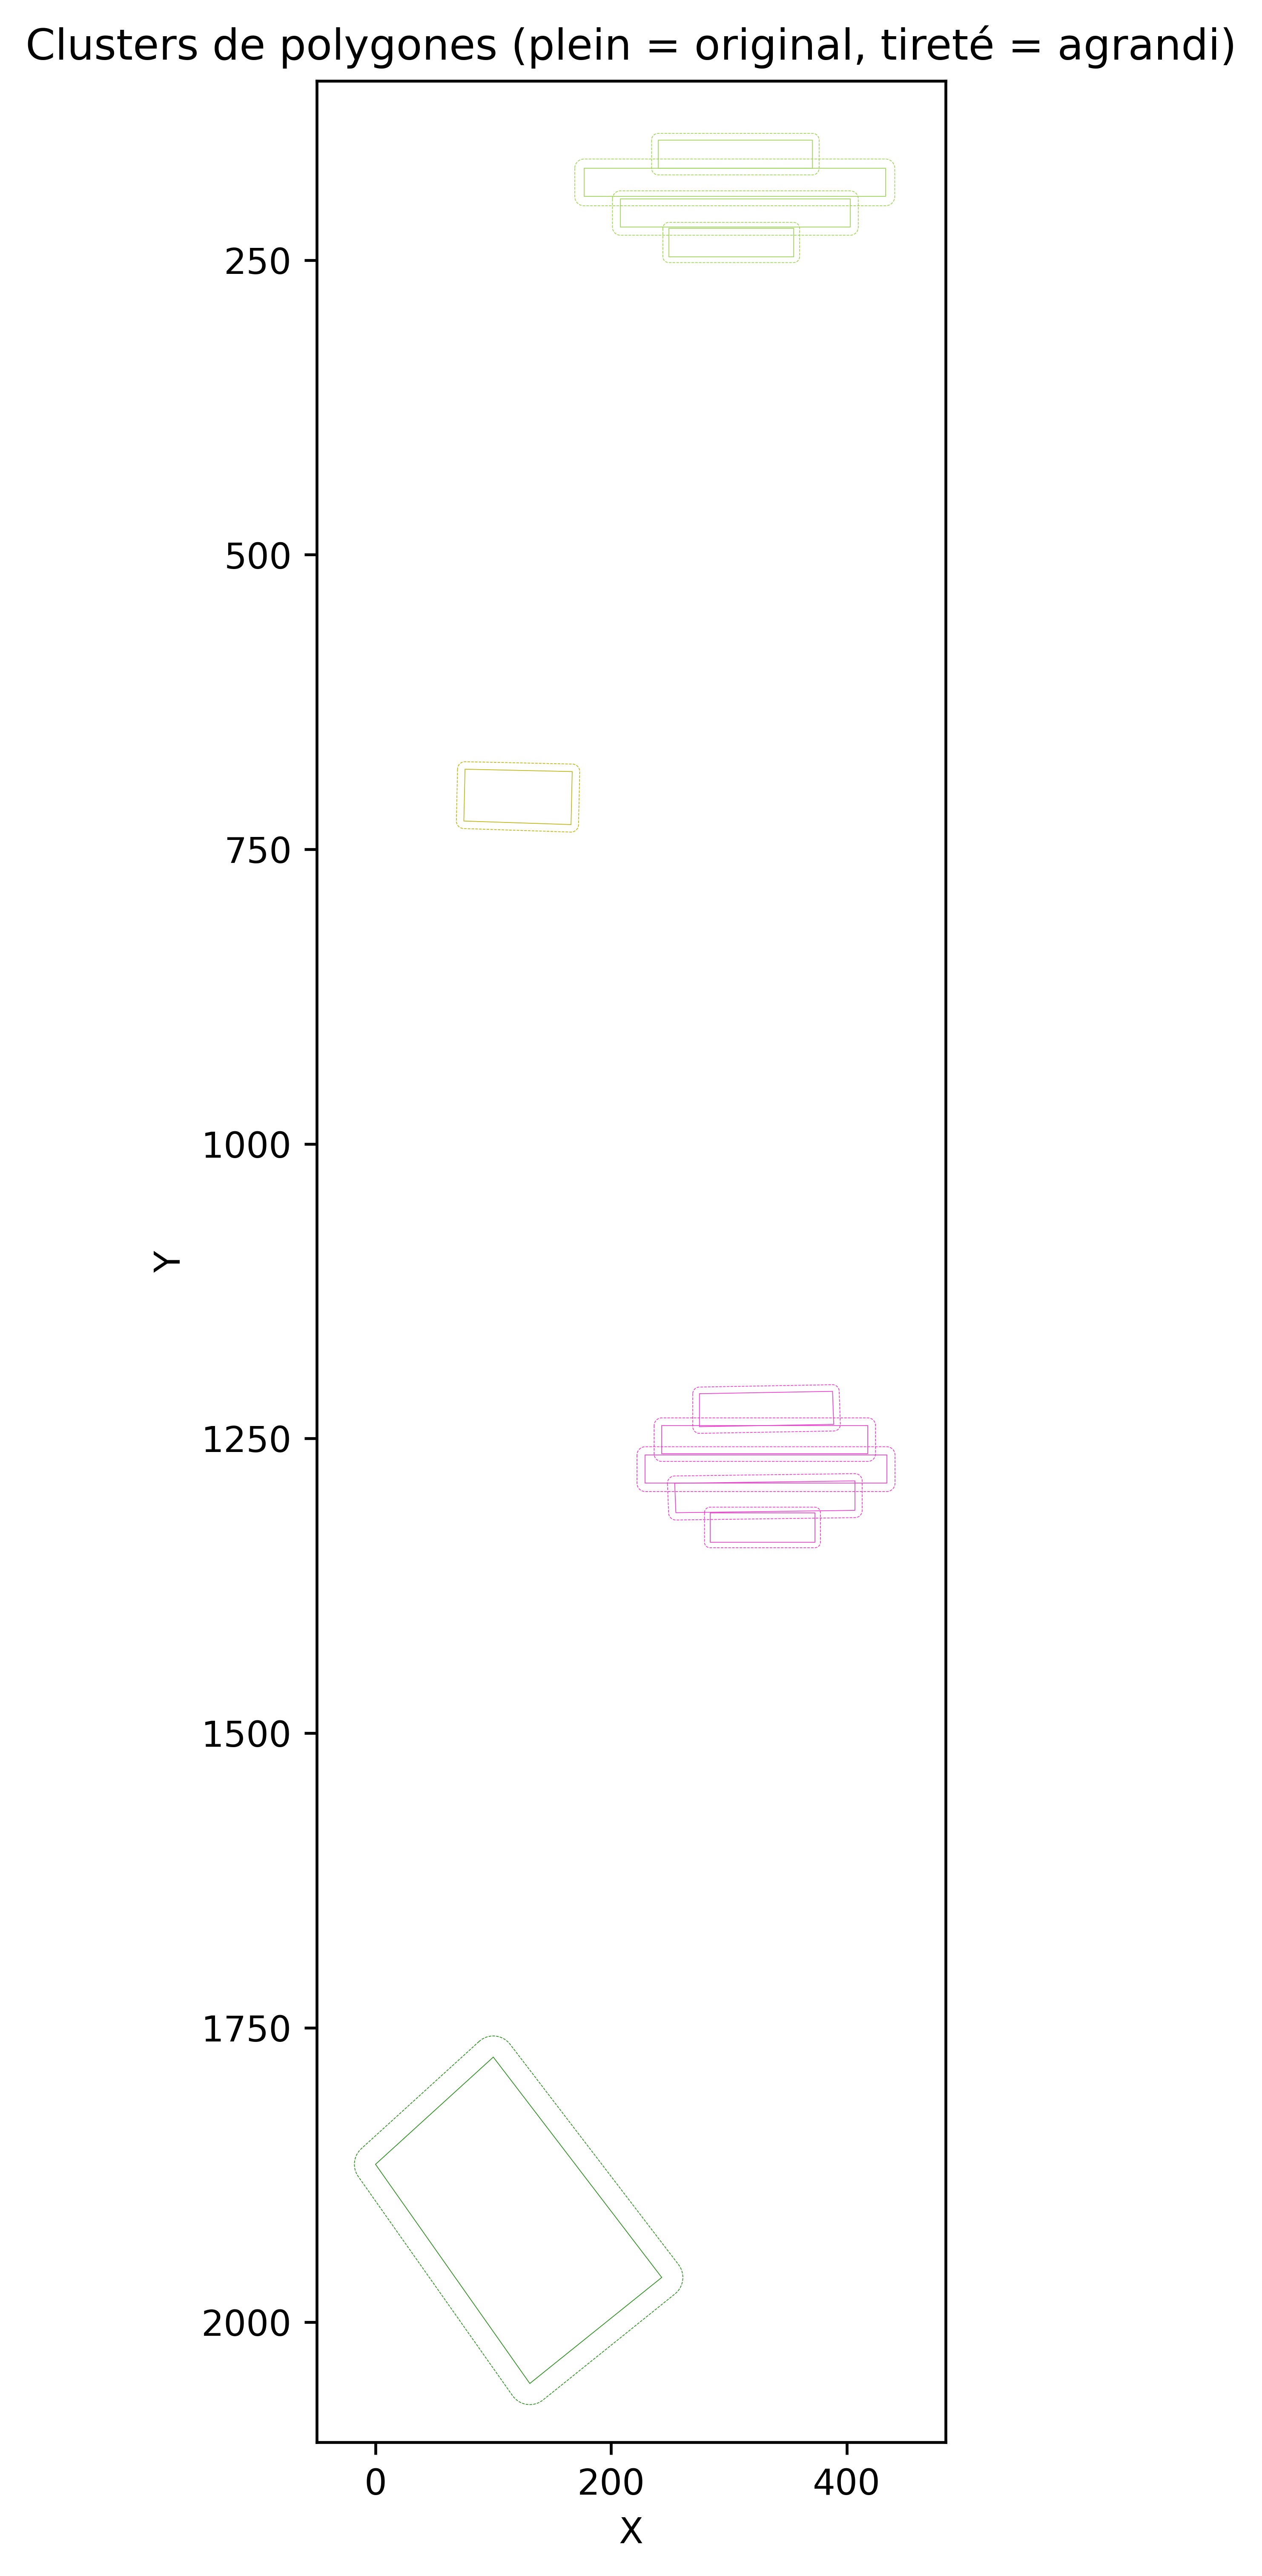

In [70]:
draw_clusters_from_df(df, "x1","y1","x2","y2","x3","y3","x4","y4", margin_factor=0.1)


In [71]:
def add_cluster_column(df, clusters):
    """
    Ajoute une colonne 'cluster' au DataFrame à partir de la liste de clusters.

    Parameters:
    - df: pandas.DataFrame
    - clusters: liste de sets, chaque set contient les indices des polygones dans ce cluster

    Returns:
    - df_copy: DataFrame avec une colonne 'cluster'
    """
    df_copy = df.copy()
    cluster_col = [-1] * len(df_copy)  # valeur par défaut pour les lignes non assignées

    for cluster_idx, cluster in enumerate(clusters):
        for row_idx in cluster:
            cluster_col[row_idx] = cluster_idx

    df_copy['cluster'] = cluster_col
    return df_copy


In [72]:
df = add_cluster_column(df, clusters)

In [73]:
import pandas as pd

def bounding_boxes_by_cluster(df):
    """
    Pour chaque cluster, crée un rectangle englobant qui contient tous les polygones du cluster.
    
    Parameters:
    - df : DataFrame avec colonnes ['x1','y1','x2','y2','x3','y3','x4','y4','cluster']
    
    Returns:
    - df_boxes : DataFrame avec ['cluster', 'x_min', 'y_min', 'x_max', 'y_max']
    """
    clusters = df['cluster'].unique()
    data = []

    for clus in clusters:
        df_clus = df[df['cluster'] == clus]
        # Récupérer toutes les coordonnées x et y
        xs = df_clus[['x1','x2','x3','x4']].values.flatten()
        ys = df_clus[['y1','y2','y3','y4']].values.flatten()
        
        x_min, x_max = xs.min(), xs.max()
        y_min, y_max = ys.min(), ys.max()
        
        data.append({
            'cluster': clus,
            'x_min': x_min,
            'y_min': y_min,
            'x_max': x_max,
            'y_max': y_max
        })
    
    df_boxes = pd.DataFrame(data)
    return df_boxes


In [96]:
df_boxes = bounding_boxes_by_cluster(df)

In [97]:
df_boxes

,cluster,x_min,y_min,x_max,y_max
0,0,177,148,433,247
1,1,75,682,167,729
2,2,229,1210,434,1338
3,3,0,1775,243,2052


In [98]:
import pandas as pd

def bounding_boxes_by_cluster_with_text(df):
    """
    Pour chaque cluster, crée un rectangle englobant et concatène les textes.
    
    Parameters:
    - df : DataFrame avec colonnes ['text','x1','y1','x2','y2','x3','y3','x4','y4','cluster']
    
    Returns:
    - df_boxes : DataFrame avec ['cluster', 'x_min', 'y_min', 'x_max', 'y_max', 'text']
    """
    clusters = df['cluster'].unique()
    data = []

    for clus in clusters:
        df_clus = df[df['cluster'] == clus]
        # Récupérer toutes les coordonnées x et y
        xs = df_clus[['x1','x2','x3','x4']].values.flatten()
        ys = df_clus[['y1','y2','y3','y4']].values.flatten()
        
        x_min, x_max = xs.min(), xs.max()
        y_min, y_max = ys.min(), ys.max()

        # Concaténer tous les textes du cluster en les séparant par un espace
        cluster_text = " ".join(df_clus['text'].astype(str).tolist())
        
        data.append({
            'cluster': clus,
            'x_min': x_min,
            'y_min': y_min,
            'x_max': x_max,
            'y_max': y_max,
            'text': cluster_text
        })
    
    df_boxes = pd.DataFrame(data)
    return df_boxes


In [99]:
df_boxes = bounding_boxes_by_cluster_with_text(df)
df_boxes

,cluster,x_min,y_min,x_max,y_max,text
0,0,177,148,433,247,ONLY A FEW THINGS ARE REMAINING THAT / CAN TEA...
1,1,75,682,167,729,"WELL,"
2,2,229,1210,434,1338,WE DON'T NEED SOMEONE ELSE TO FIND OUR OWN PAT...
3,3,0,1775,243,2052,Xinur


In [76]:
from PIL import Image

def save_crops_from_coords(image_path, coords_list, output_folder):
    """
    Découpe et sauvegarde des zones d'une image à partir de coordonnées.

    Parameters:
    - image_path: chemin vers l'image source
    - coords_list: liste de tuples (x_min, y_min, x_max, y_max)
    - output_folder: dossier où sauvegarder les captures
    """
    img = Image.open(image_path)
    
    for i, (x_min, y_min, x_max, y_max) in enumerate(coords_list):
        crop = img.crop((int(x_min), int(y_min), int(x_max), int(y_max)))
        crop_path = f"{output_folder}/cluster_{i}.png"
        crop.save(crop_path)
        print(f"Cluster {i} sauvegardé : {crop_path}")

save_crops_from_coords("test.jpg", df_boxes[["x_min", "y_min", "x_max", "y_max"]].values, "output")


Cluster 0 sauvegardé : output/cluster_0.png
Cluster 1 sauvegardé : output/cluster_1.png
Cluster 2 sauvegardé : output/cluster_2.png
Cluster 3 sauvegardé : output/cluster_3.png


In [77]:
import matplotlib.pyplot as plt
import random
from shapely.geometry import Polygon

def draw_clusters_with_bounding_boxes(df, *coord_cols, margin_factor=0.1, dpi=600, linewidth=0.2):
    """
    Dessine des polygones groupés par cluster à partir d'un DataFrame
    et ajoute le rectangle englobant de chaque cluster.
    
    Parameters:
    - df: pandas.DataFrame contenant les colonnes de coordonnées
    - *coord_cols: noms des colonnes (x1, y1, x2, y2, ...)
    - margin_factor: float, fraction de la "taille" du polygone utilisée comme marge
    - dpi: résolution de l'image
    - linewidth: épaisseur des traits
    """
    # Construire la liste de polygones à partir du DataFrame
    n_points = len(coord_cols) // 2
    polys_points = []
    for idx, row in df.iterrows():
        points = []
        for i in range(n_points):
            x_col = coord_cols[2*i]
            y_col = coord_cols[2*i + 1]
            points.append([row[x_col], row[y_col]])
        polys_points.append(points)
    
    # Clustering
    clusters = cluster_polygons(df, *coord_cols, margin_factor=margin_factor)
    
    plt.figure(figsize=(12, 12), dpi=dpi)
    ax = plt.gca()
    
    # Convertir chaque polygone pour matplotlib
    polys = [Polygon(p) for p in polys_points]
    
    # Dessiner chaque cluster avec une couleur différente
    for cluster in clusters:
        color = [random.random() for _ in range(3)]
        for idx in cluster:
            poly = polys[idx]
            # Polygon original
            ax.add_patch(plt.Polygon(list(poly.exterior.coords), fill=False, edgecolor=color, linewidth=linewidth))
            
            # Polygon agrandi avec marge proportionnelle à sa taille
            size = poly.area**0.5
            margin = size * margin_factor
            poly_buffered = poly.buffer(margin)
            ax.add_patch(plt.Polygon(list(poly_buffered.exterior.coords), fill=False, edgecolor=color, linestyle='--', linewidth=linewidth))
    
    # Calculer les rectangles englobants pour chaque cluster
    df_boxes = bounding_boxes_by_cluster(df)
    for _, row in df_boxes.iterrows():
        x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
        # Rectangle englobant
        rect_coords = [
            [x_min, y_min],
            [x_max, y_min],
            [x_max, y_max],
            [x_min, y_max],
            [x_min, y_min]  # pour fermer le rectangle
        ]
        ax.add_patch(plt.Polygon(rect_coords, fill=False, edgecolor='black', linestyle=':', linewidth=linewidth))
    
    # Ajuster limites
    all_x = [pt[0] for p in polys_points for pt in p]
    all_y = [pt[1] for p in polys_points for pt in p]
    ax.set_xlim(min(all_x) - 50, max(all_x) + 50)
    ax.set_ylim(min(all_y) - 50, max(all_y) + 50)
    ax.invert_yaxis()
    
    ax.set_aspect('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters de polygones avec rectangles englobants')
    plt.show()


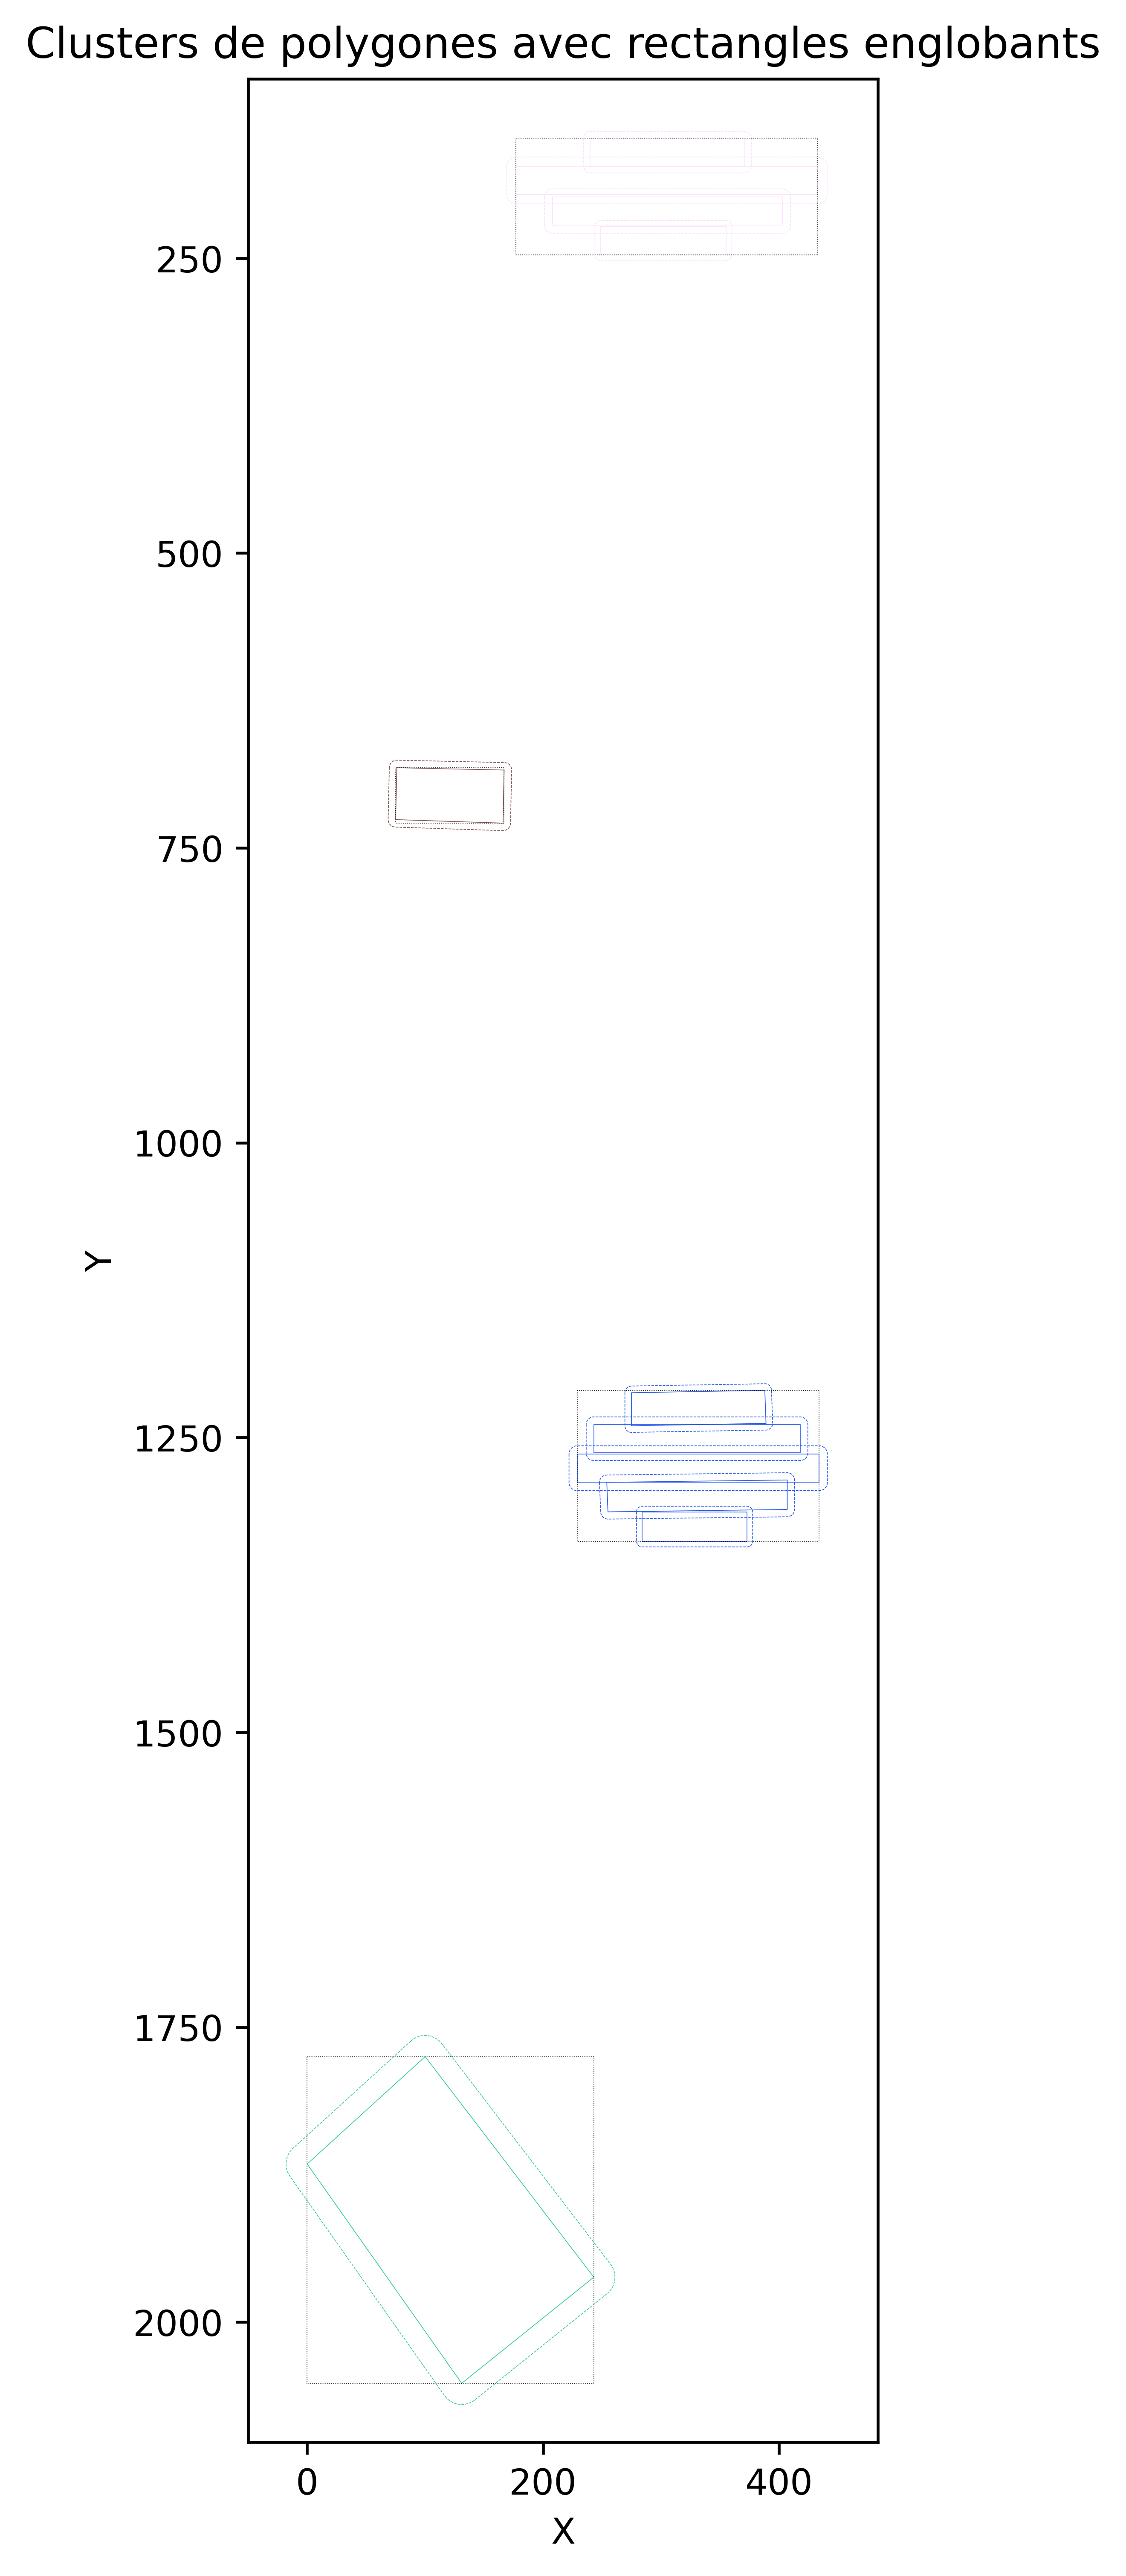

In [78]:
draw_clusters_with_bounding_boxes(df, "x1","y1","x2","y2","x3","y3","x4","y4", margin_factor=0.1)

In [79]:
df

,text,score,x1,y1,x2,y2,x3,y3,x4,y4,cluster
0,ONLY A FEW,0.995998,240,148,371,148,371,172,240,172,0
1,THINGS ARE REMAINING,0.988036,177,172,433,172,433,196,177,196,0
2,THAT / CAN TEACH,0.989309,208,198,403,198,403,222,208,222,0
3,HIM NOW.,0.999486,249,223,355,223,355,247,249,247,0
4,"WELL,",0.997695,76,682,167,684,166,729,75,726,1
5,WE DON'T,0.998874,275,1212,388,1210,389,1238,275,1240,2
6,NEED SOMEONE,0.999617,243,1239,418,1239,418,1263,243,1263,2
7,ELSE TO FIND OUR,0.997615,229,1264,434,1264,434,1288,229,1288,2
8,OWN PATH OF,0.969900,254,1288,407,1286,407,1311,255,1313,2
9,SWORD.,0.999008,284,1313,373,1313,373,1338,284,1338,2


In [80]:
import ollama
import re

def ollama_llm(question):
    formatted_prompt = (
        f"Question : {question}"
    )
    
    response = ollama.chat(
        model="gemma3n:e2b",
        messages=[{'role': 'user', 'content': formatted_prompt}]
    )

    response_content = response['message']['content']
    final_answer = re.sub(r'<think>.*?</think>',
                          '',
                          response_content,
                          flags=re.DOTALL).strip()
    return final_answer

In [81]:
ollama_llm("comment va tu ?")

"Je vais bien, merci de demander ! En tant que grand modèle linguistique, je n'ai pas d'émotions ni d'état physique, mais je fonctionne parfaitement et suis prêt à répondre à vos questions. \n\nEt vous, comment allez-vous ? 😊"

In [ ]:
import ollama
import re

def ollama_translate_en_fr(text, context="", previous_dialogues="", model="gemma3n:e2b"):
    """
    Translate English text into French using Ollama.
    
    Parameters:
    - text: str, English text to translate
    - context: str, optional contextual instructions
    - model: str, Ollama model name
    
    Returns:
    - str: translated text in French
    """
    prompt = (
        f"Translate the following text from English to French.\n"
        f"Context: {context}\n"
        f"Previous dialogues : {previous_dialogues}\n"
        f"Instruction: ONLY output the translated French text in UPPERCASE, with no explanations, notes, extra formatting, or line breaks.\n"
        f"If you absolutely do not know how to translate a word or phrase, do not translate it and leave it as-is.\n"
        f"Text: {text}"
    )
    print(prompt)
    response = ollama.chat(
        model=model,
        messages=[
            {"role": "system", "content": "You are a professional English-to-French translator."},
            {"role": "user", "content": prompt}
        ]
    )

    # Remove any internal tags like <think> ... </think>
    response_content = response['message']['content']
    final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()

    return final_answer

In [92]:
ollama_translate_en_fr("Hey! Are you coming to the festival tonight?", "Translating dialogues from a webtoon")

'Hé ! Tu viens au festival ce soir ?'

In [93]:
def translate_cluster_texts(df, translator_func, context="Translating dialogues from a webtoon"):
    translated_clusters = {}
    previous_dialogues = ""
    for cluster_id, group in df.groupby("cluster"):
        # Regrouper le texte du cluster
        cluster_text = " ".join(group["text"].tolist())
        previous_dialogues = previous_dialogues + cluster_text
        print(f"\nCluster {cluster_id} original text:\n{cluster_text}\n")
        
        # Traduire
        translated_text = translator_func(
            text=cluster_text,
            context=context,
            previous_dialogues=previous_dialogues
        )
        print(f"Cluster {cluster_id} translated:\n{translated_text}\n")
        translated_clusters[cluster_id] = translated_text
    
    return translated_clusters

In [94]:
df

,text,score,x1,y1,x2,y2,x3,y3,x4,y4,cluster
0,ONLY A FEW,0.995998,240,148,371,148,371,172,240,172,0
1,THINGS ARE REMAINING,0.988036,177,172,433,172,433,196,177,196,0
2,THAT / CAN TEACH,0.989309,208,198,403,198,403,222,208,222,0
3,HIM NOW.,0.999486,249,223,355,223,355,247,249,247,0
4,"WELL,",0.997695,76,682,167,684,166,729,75,726,1
5,WE DON'T,0.998874,275,1212,388,1210,389,1238,275,1240,2
6,NEED SOMEONE,0.999617,243,1239,418,1239,418,1263,243,1263,2
7,ELSE TO FIND OUR,0.997615,229,1264,434,1264,434,1288,229,1288,2
8,OWN PATH OF,0.969900,254,1288,407,1286,407,1311,255,1313,2
9,SWORD.,0.999008,284,1313,373,1313,373,1338,284,1338,2


In [110]:
def translate_cluster_texts(df_boxes, translator_func, context="Translating dialogues from a webtoon"):
    """
    Traduire le texte de chaque cluster à partir d'un DataFrame df_boxes
    et ajouter une colonne 'translated'.
    
    Parameters:
    - df_boxes : DataFrame avec colonnes ['cluster', 'x_min','y_min','x_max','y_max','text']
    - translator_func : fonction de traduction, prenant text, context et previous_dialogues
    - context : str, instructions contextuelles pour le traducteur
    
    Returns:
    - df_result : DataFrame identique à df_boxes avec une colonne 'translated'
    """
    df_result = df_boxes.copy()
    previous_dialogues = ""

    translated_texts = []

    for idx, row in df_result.iterrows():
        cluster_text = row["text"]
        print(f"\nCluster {row['cluster']} original text:\n{cluster_text}\n")

        # Traduire
        translated_text = translator_func(
            text=cluster_text,
            context=context,
            previous_dialogues=previous_dialogues
        )

        print(f"Cluster {row['cluster']} translated:\n{translated_text}\n")
        translated_texts.append(translated_text)

        # Mettre à jour les dialogues précédents
        previous_dialogues += " " + cluster_text

    # Ajouter la colonne 'translated'
    df_result["translated"] = translated_texts
    return df_result


In [111]:
translated_clusters = translate_cluster_texts(df_boxes, ollama_translate_en_fr,"Translating dialogues from a webtoon")


Cluster 0 original text:
ONLY A FEW THINGS ARE REMAINING THAT / CAN TEACH HIM NOW.

Translate the following text from English to French.
Context: Translating dialogues from a webtoon
Previous dialogues : 
Instruction: ONLY output the translated French text, with no explanations, notes, or extra formatting.
If you absolutely do not know how to translate a word or phrase, do not translate it and leave it as-is.
Text: ONLY A FEW THINGS ARE REMAINING THAT / CAN TEACH HIM NOW.
Cluster 0 translated:
Seulement quelques choses restent à lui enseigner maintenant.


Cluster 1 original text:
WELL,

Translate the following text from English to French.
Context: Translating dialogues from a webtoon
Previous dialogues :  ONLY A FEW THINGS ARE REMAINING THAT / CAN TEACH HIM NOW.
Instruction: ONLY output the translated French text, with no explanations, notes, or extra formatting.
If you absolutely do not know how to translate a word or phrase, do not translate it and leave it as-is.
Text: WELL,
Clust

In [112]:
translated_clusters

,cluster,x_min,y_min,x_max,y_max,text,translated
0,0,177,148,433,247,ONLY A FEW THINGS ARE REMAINING THAT / CAN TEA...,Seulement quelques choses restent à lui enseig...
1,1,75,682,167,729,"WELL,","Eh bien,"
2,2,229,1210,434,1338,WE DON'T NEED SOMEONE ELSE TO FIND OUR OWN PAT...,Nous n'avons pas besoin de quelqu'un d'autre p...
3,3,0,1775,243,2052,Xinur,Xinur


In [109]:
translated_clusters

{0: 'Seulement quelques choses restent à lui enseigner maintenant.',
 1: 'Eh bien,',
 2: "Nous n'avons pas besoin de quelqu'un d'autre pour trouver notre propre chemin avec l'épée.",
 3: 'Xinur'}